| Model                                              | Accuracy | Precision | Recall | F1 Score | ROC-AUC | PR-AUC | RMSE   |
| -------------------------------------------------- | -------- | --------- | ------ | -------- | ------- | ------ | ------ |
| XGBoost                                            | 95.20%   | 19.44%    | 24.14% | 21.54%   | 0.9193  | 0.1784 | -      |
| Baseline GCN                                       | 80.63%   | 17.61%    | 65.41% | 27.75%   | 0.8271  | 0.3676 | 0.4401 |
| GCN with pseudo-labelling                          | 82.56%   | 15.16%    | 59.12% | 24.13%   | 0.8055  | 0.1406 | 0.4176 |
| GCN with pseudo-labelling and maintain class ratio | 78.95%   | 14.51%    | 62.42% | 23.55%   | 0.8112  | 0.1838 | 0.4588 |
| GCN with pseudo-labelling and validation gating    | 82.35%   | 16.70%    | 59.75% | 26.11%   | 0.8198  | 0.2048 | 0.4201 |


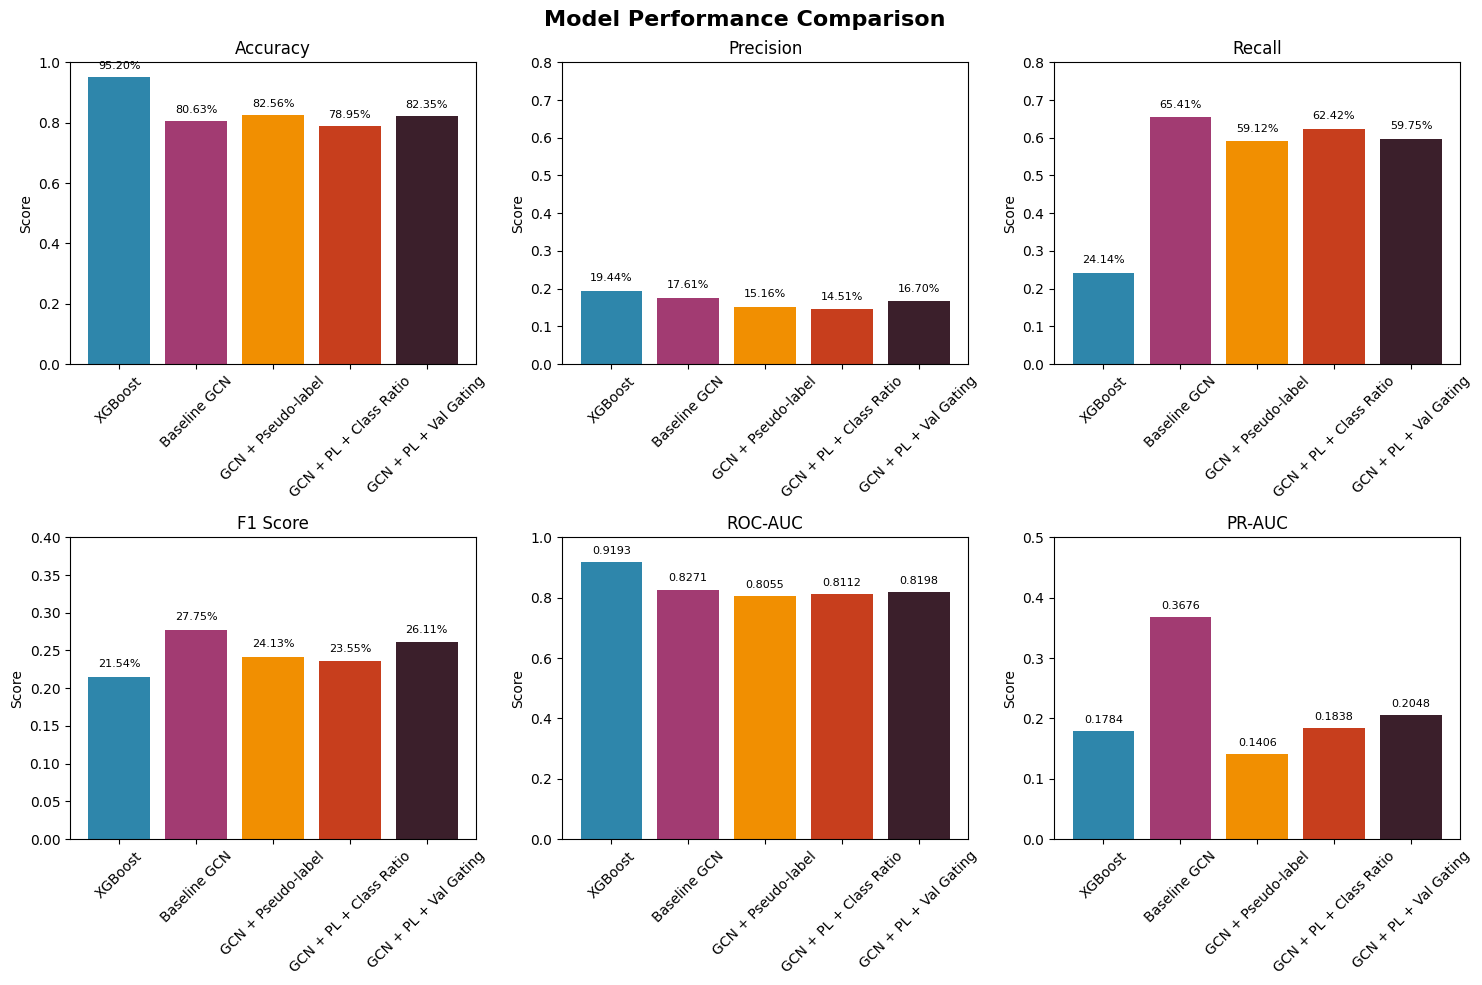

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names (shortened for display)
models = [
    'XGBoost',
    'Baseline GCN',
    'GCN + Pseudo-label',
    'GCN + PL + Class Ratio',
    'GCN + PL + Val Gating'
]

# Performance metrics (converted to decimals)
accuracy = [0.9520, 0.8063, 0.8256, 0.7895, 0.8235]
precision = [0.1944, 0.1761, 0.1516, 0.1451, 0.1670]
recall = [0.2414, 0.6541, 0.5912, 0.6242, 0.5975]
f1_score = [0.2154, 0.2775, 0.2413, 0.2355, 0.2611]
roc_auc = [0.9193, 0.8271, 0.8055, 0.8112, 0.8198]
pr_auc = [0.1784, 0.3676, 0.1406, 0.1838, 0.2048]

# Set up the figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Color palette
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3B1F2B']

# Plot 1: Accuracy
ax1 = axes[0, 0]
bars1 = ax1.bar(models, accuracy, color=colors)
ax1.set_ylabel('Score')
ax1.set_title('Accuracy')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='x', rotation=45)
for bar, val in zip(bars1, accuracy):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{val:.2%}', ha='center', va='bottom', fontsize=8)

# Plot 2: Precision
ax2 = axes[0, 1]
bars2 = ax2.bar(models, precision, color=colors)
ax2.set_ylabel('Score')
ax2.set_title('Precision')
ax2.set_ylim(0, 0.8)
ax2.tick_params(axis='x', rotation=45)
for bar, val in zip(bars2, precision):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{val:.2%}', ha='center', va='bottom', fontsize=8)

# Plot 3: Recall
ax3 = axes[0, 2]
bars3 = ax3.bar(models, recall, color=colors)
ax3.set_ylabel('Score')
ax3.set_title('Recall')
ax3.set_ylim(0, 0.8)
ax3.tick_params(axis='x', rotation=45)
for bar, val in zip(bars3, recall):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{val:.2%}', ha='center', va='bottom', fontsize=8)

# Plot 4: F1 Score
ax4 = axes[1, 0]
bars4 = ax4.bar(models, f1_score, color=colors)
ax4.set_ylabel('Score')
ax4.set_title('F1 Score')
ax4.set_ylim(0, 0.4)
ax4.tick_params(axis='x', rotation=45)
for bar, val in zip(bars4, f1_score):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{val:.2%}', ha='center', va='bottom', fontsize=8)

# Plot 5: ROC-AUC
ax5 = axes[1, 1]
bars5 = ax5.bar(models, roc_auc, color=colors)
ax5.set_ylabel('Score')
ax5.set_title('ROC-AUC')
ax5.set_ylim(0, 1)
ax5.tick_params(axis='x', rotation=45)
for bar, val in zip(bars5, roc_auc):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{val:.4f}', ha='center', va='bottom', fontsize=8)

# Plot 6: PR-AUC
ax6 = axes[1, 2]
bars6 = ax6.bar(models, pr_auc, color=colors)
ax6.set_ylabel('Score')
ax6.set_title('PR-AUC')
ax6.set_ylim(0, 0.5)
ax6.tick_params(axis='x', rotation=45)
for bar, val in zip(bars6, pr_auc):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{val:.4f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()